In [1]:
import astropy.io
from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize as opt
from scipy.optimize import curve_fit
from itertools import islice


In [72]:
target1 = pd.read_csv('J081805.14+200235.4.csv')
abflux = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328)
opflux = 10**(23-(target1.Mag +48.6)/2.5)
opflux_err = 10**(23-(target1.Mag + target1.Magerr +48.6)/2.5) - 10**(23-(target1.Mag +48.6)/2.5)
#opflux_err = (3631 * 3.6 * 10**(-10) * np.sinh(-0.92103 * (target1.Mag + target1.Magerr)+22.4328)) - (3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328))                

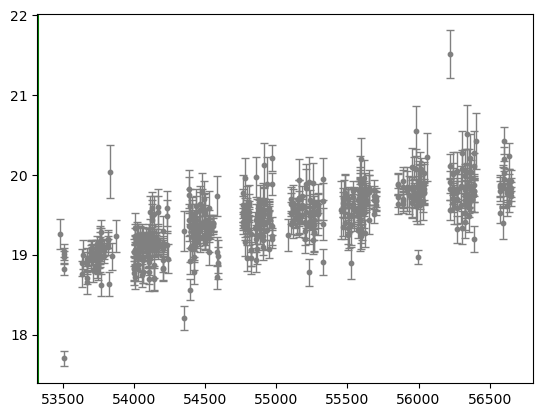

In [73]:
plt.scatter(target1.MJD,target1.Mag, s = 10, color = 'gray')
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray')
plt.axvline(x=53327 , color ='g')	
#plt.axvline(x= , color ='g')	

In [74]:
sorted_MJD =sorted(target1.MJD)
len(sorted_MJD)

600

In [75]:
diff = []
for i in range(0,len(sorted_MJD)-1):
    diff.append(sorted_MJD[i+1] -sorted_MJD[i])
diff

[25.947110000000976,
 3.975749999997788,
 0.007109999998647254,
 0.005949999998847488,
 0.005920000003243331,
 126.29795000000013,
 0.004899999999906868,
 8.01520999999775,
 26.931940000002214,
 0.006470000000263099,
 1.057009999996808,
 0.006450000000768341,
 0.006220000002940651,
 0.006279999994148966,
 27.967060000002675,
 0.007920000003650784,
 0.007849999994505197,
 0.007900000004156027,
 5.940060000000813,
 0.007310000000870787,
 0.0072099999961210415,
 0.007409999998344574,
 7.86373000000458,
 16.07568999999785,
 0.005530000002181623,
 0.005460000000311993,
 0.0054799999998067506,
 8.942259999996168,
 0.007400000002235174,
 0.007409999998344574,
 0.007389999998849817,
 5.957220000003872,
 0.005359999995562248,
 0.005380000002332963,
 0.0053699999989476055,
 0.07430000000022119,
 0.02111000000149943,
 7.773650000002817,
 3.1146499999958905,
 1.0692800000033458,
 0.00503000000026077,
 0.005099999994854443,
 0.005040000003646128,
 0.8413199999995413,
 0.004919999999401625,
 0.00493

In [76]:
sum = 0
seppt = []
for j in range (0,len(diff)):
    if diff[j] >100:
        sum += 1
        seppt.append(j)
print(sum)
seppt

9


[5, 63, 169, 246, 324, 387, 468, 517, 576]

In [77]:
slice_length = []
slice_length.append(seppt[0]+1)

for i in range(0,len(seppt)-1):
    slice_length.append(seppt[i+1]-seppt[i])
slice_length.append(len(sorted_MJD)-seppt[-1])
slice_length

[6, 58, 106, 77, 78, 63, 81, 49, 59, 24]

In [78]:
Input = iter(sorted_MJD)
grouped_MJD =  [list(islice(Input, elem)) for elem in slice_length] 

In [79]:
data = target1.sort_values('MJD')
target1.sort_values('MJD')

,InputID,ID,Mag,Magerr,RA,Decl,MJD,Blend
0,J081805.14+200235.4,1121042007836,19.26,0.19,124.52146,20.04261,53480.22658,0
2,J081805.14+200235.4,1121042007836,17.70,0.10,124.52085,20.04242,53506.17369,0
293,J081805.14+200235.4,2120109018300,18.97,0.08,124.52147,20.04312,53510.14944,0
294,J081805.14+200235.4,2120109018300,18.82,0.08,124.52161,20.04309,53510.15655,0
295,J081805.14+200235.4,2120109018300,19.01,0.08,124.52140,20.04321,53510.16250,0
...,...,...,...,...,...,...,...,...
595,J081805.14+200235.4,2120109018300,19.88,0.13,124.52157,20.04311,56639.36907,0
596,J081805.14+200235.4,2120109018300,19.79,0.12,124.52151,20.04313,56649.43590,0
597,J081805.14+200235.4,2120109018300,19.93,0.13,124.52150,20.04326,56649.44706,0
598,J081805.14+200235.4,2120109018300,19.73,0.12,124.52147,20.04316,56649.45811,0


In [80]:
df_1 = data.iloc[:seppt[0],:]
df_1.to_csv('Group1.csv', index=False)
#print(df_1)
grouped_MJD[0][-1]

53510.16842

In [81]:
df_2 = data.iloc[seppt[0]+1:seppt[1],:]
#print(df_2)
df_2.to_csv('Group2.csv', index=False)
grouped_MJD[1][-1]

53875.15158

In [82]:
df_3 = data.iloc[seppt[1]+1:seppt[2],:]
#print(df_3)
df_3.to_csv('Group3.csv', index=False)
grouped_MJD[2][-1]

54238.15005

In [13]:
df_4 = data.iloc[seppt[2]+1:seppt[3],:]
#print(df_4)
df_4.to_csv('Group4.csv', index=False)
grouped_MJD[3][-1]

54592.15419

In [14]:
df_5 = data.iloc[seppt[3]+1:seppt[4],:]
#print(df_5)
df_5.to_csv('Group5.csv', index=False)
grouped_MJD[4][-1]

54967.17418

In [15]:
df_6 = data.iloc[seppt[4]+1:seppt[5],:]
#print(df_6)
df_6.to_csv('Group6.csv', index=False)
grouped_MJD[5][-1]

55329.16023

In [16]:
df_7 = data.iloc[seppt[5]+1:seppt[6],:]
#print(df_7)
df_7.to_csv('Group7.csv', index=False)
grouped_MJD[6][-1]

55703.16074

In [17]:
df_8 = data.iloc[seppt[6]+1:seppt[7],:]
#print(df_8)
df_8.to_csv('Group8.csv', index=False)
grouped_MJD[7][-1]

56060.16024

In [18]:
df_9 = data.iloc[seppt[7]+1:seppt[8],:]
#print(df_9)
df_9.to_csv('Group9.csv', index=False)
grouped_MJD[8][-1]

56405.14739

In [20]:
df_10 = data.iloc[seppt[8]+1:,:]
#print(df_10)
df_10.to_csv('Group10.csv', index=False)
grouped_MJD[9][-1]

56649.46655

In [ ]:
df_11 = data.iloc[seppt[9]+1:seppt[10],:]
#print(df_11)
df_11.to_csv('Group11.csv', index=False)
grouped_MJD[10][-1]

In [ ]:
df_12 = data.iloc[seppt[10]+1:,:]
#print(df_12)
df_12.to_csv('Group12.csv', index=False)
grouped_MJD[11][-1]

In [21]:
med = []
centerMJD = []
medMJD = []
medopflux = []

g1 = pd.read_csv('group1.csv')
med1 = np.median(g1.Mag)
centerMJD1 = np.mean(g1.MJD)
medMJD1 = np.median(g1.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g1.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


g2 = pd.read_csv('group2.csv')
med1 = np.median(g2.Mag)
centerMJD1 = np.mean(g2.MJD)
medMJD1 = np.median(g2.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g2.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g3 = pd.read_csv('group3.csv')
med1 = np.median(g3.Mag)
centerMJD1 = np.mean(g3.MJD)
medMJD1 = np.median(g3.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g3.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g4 = pd.read_csv('group4.csv')
med1 = np.median(g4.Mag)
centerMJD1 = np.mean(g4.MJD)
medMJD1 = np.median(g4.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g4.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g5 = pd.read_csv('group5.csv')
med1 = np.median(g5.Mag)
centerMJD1 = np.mean(g5.MJD)
medMJD1 = np.median(g5.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g5.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g6 = pd.read_csv('group6.csv')
med1 = np.median(g6.Mag)
centerMJD1 = np.mean(g6.MJD)
medMJD1 = np.median(g6.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g6.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g7 = pd.read_csv('group7.csv')
med1 = np.median(g7.Mag)
centerMJD1 = np.mean(g7.MJD)
medMJD1 = np.median(g7.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g7.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g8 = pd.read_csv('group8.csv')
med1 = np.median(g8.Mag)
centerMJD1 = np.mean(g8.MJD)
medMJD1 = np.median(g8.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g8.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g9 = pd.read_csv('group9.csv')
med1 = np.median(g9.Mag)
centerMJD1 = np.mean(g9.MJD)
medMJD1 = np.median(g9.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g9.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)



In [22]:
g10= pd.read_csv('group10.csv')
med1 = np.median(g10.Mag)
centerMJD1 = np.mean(g10.MJD)
medMJD1 = np.median(g10.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g10.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


In [ ]:

g11= pd.read_csv('group11.csv')
med1 = np.median(g11.Mag)
centerMJD1 = np.mean(g11.MJD)
medMJD1 = np.median(g11.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g11.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g12= pd.read_csv('group12.csv')
med1 = np.median(g12.Mag)
centerMJD1 = np.mean(g12.MJD)
medMJD1 = np.median(g12.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g12.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


In [23]:
med

[18.97,
 19.0,
 19.12,
 19.355,
 19.46,
 19.515,
 19.66,
 19.810000000000002,
 19.8,
 19.84]

In [24]:
centerMJD

[53503.373752,
 53741.11657,
 54097.72917152381,
 54464.96453605264,
 54858.29387116882,
 55206.20874209677,
 55579.960675500006,
 55968.16050958334,
 56313.39735741379,
 56614.88364521738]

In [25]:
medMJD


[53510.14944,
 53745.34188,
 54108.31102,
 54454.290175,
 54867.2386,
 55206.830245,
 55590.24587,
 55982.200425,
 56328.21974,
 56622.48185]

In [26]:
medopflux


[9.375620069258831e-05,
 9.120108393559115e-05,
 8.165823713585905e-05,
 6.576648110374322e-05,
 5.970352865838366e-05,
 5.675506235465244e-05,
 4.9659232145033374e-05,
 4.325321763188002e-05,
 4.3651583224016295e-05,
 4.2072662838444633e-05]

In [27]:
st = 	53480
#start of observations

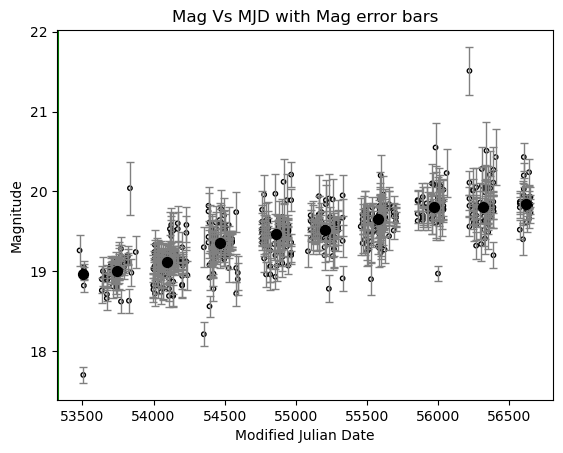

In [28]:
plt.scatter(target1.MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(centerMJD,med, s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x=53327  , color ='g')	
#plt.axvline(x=  , color ='g')	

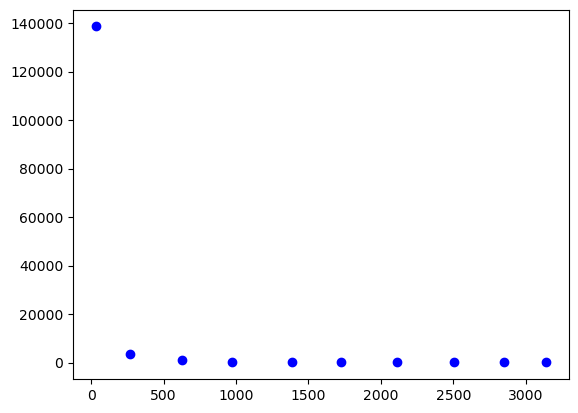

In [31]:
def f(x, a, b, c):
    return a * (x ** b) + c
x = np.array([item - st for item in medMJD])
y = f(x,4.05245427e+07,-1.667, 1.81095672e+01)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [32]:
popt3, pcov3 = curve_fit(f, x, med, maxfev =5000)


In [33]:
popt3

array([2.27490533e-03, 7.55554380e-01, 1.88959238e+01])

In [34]:
pcov3

array([[ 5.73457726e-06, -3.02153210e-04, -1.35299382e-04],
       [-3.02153210e-04,  1.59671231e-02,  6.93257150e-03],
       [-1.35299382e-04,  6.93257150e-03,  4.33458044e-03]])

In [35]:
 np.sqrt(np.diag(pcov3))

array([0.0023947 , 0.12636108, 0.06583753])

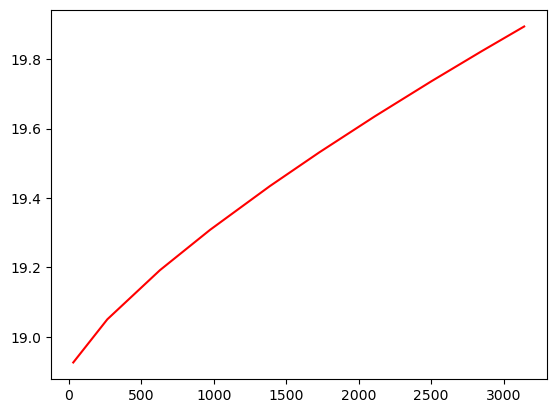

In [36]:
plt.plot(x, f(x,*popt3), 'r-')

In [ ]:
def g(x, a, b):
    return a * (x ** b) + 18
x = np.array([item - st	 for item in medMJD])
y = g(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [37]:
popt4, pcov4 = curve_fit(f, target1.MJD - st	, target1.Mag )

In [38]:
popt4

array([4.75825188e-03, 6.82723095e-01, 1.87633358e+01])

In [39]:
pcov4

array([[ 1.31318978e-05, -3.21058628e-04, -2.58286363e-04],
       [-3.21058628e-04,  7.86478809e-03,  6.23838159e-03],
       [-2.58286363e-04,  6.23838159e-03,  5.55572096e-03]])

In [40]:
 np.sqrt(np.diag(pcov4))

array([0.0036238 , 0.08868364, 0.07453671])

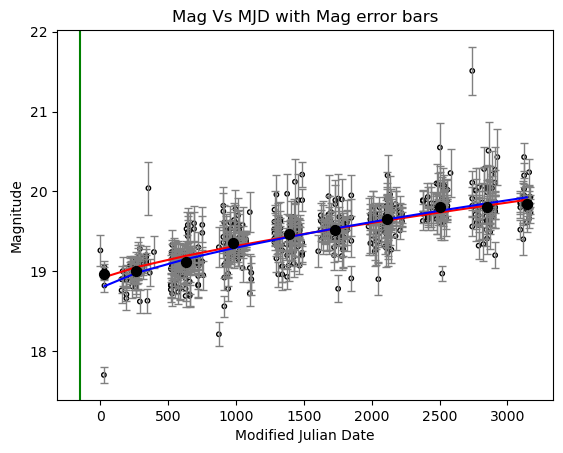

In [41]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,med, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 53327 -st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x,*popt3), 'r-', zorder=3)
plt.plot(x, f(x,*popt4), 'b-', zorder=3)
#plt.plot(x, g(x, 0.66649567, -0.32796038), 'y-', zorder=3)
#plt.plot(x, g(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g', zorder=3)



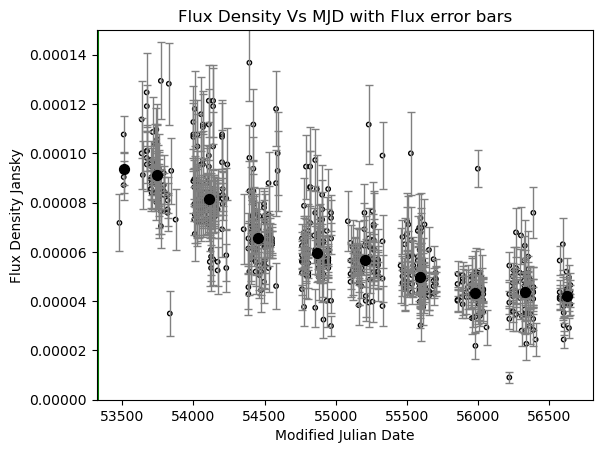

In [83]:
plt.scatter(target1.MJD ,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
#plt.scatter(target1.MJD ,abflux , s = 10, edgecolors = 'r', facecolors = 'none', zorder = 1)
plt.scatter(medMJD ,medopflux , s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,opflux, yerr = np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Flux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
plt.ylim(0, 0.00015)

plt.axvline(x=53327  , color ='g')	
#plt.axvline(x= , color ='g')

In [57]:
popt2, pcov2 = curve_fit(f, x, medopflux, maxfev =5000)

In [58]:
popt2

array([-5.24417675e-07,  5.93405293e-01,  1.00799321e-04])

In [59]:
pcov2

array([[ 3.35379605e-13,  7.48650478e-08, -3.07094129e-12],
       [ 7.48650478e-08,  1.67736945e-02, -6.67914978e-07],
       [-3.07094129e-12, -6.67914978e-07,  3.46556966e-11]])

In [60]:
 np.sqrt(np.diag(pcov2))

array([5.79119681e-07, 1.29513299e-01, 5.88690891e-06])

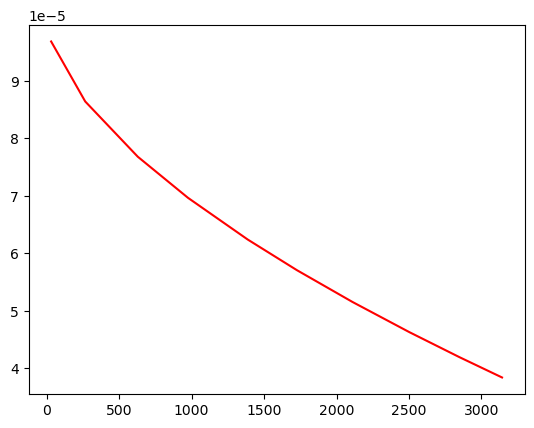

In [61]:
plt.plot(x, f(x,*popt2), 'r-')

In [62]:
popt1, pcov1 = curve_fit(f, target1.MJD - st, opflux, maxfev =5000)

In [63]:
popt1

array([-3.92269691e-06,  3.89854156e-01,  1.29281569e-04])

In [64]:
pcov1

array([[ 7.03775936e-12,  1.88632635e-07, -2.70007153e-11],
       [ 1.88632635e-07,  5.07178077e-03, -7.16221750e-07],
       [-2.70007153e-11, -7.16221750e-07,  1.07544008e-10]])

In [65]:
 np.sqrt(np.diag(pcov1))

array([2.65287756e-06, 7.12164361e-02, 1.03703427e-05])

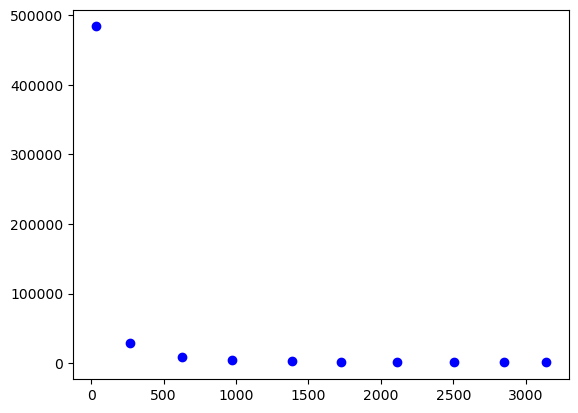

In [66]:
def h(x, a, b):
    return a * (x ** b) + 0.00015
x = np.array([item - st	 for item in medMJD])
y = h(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


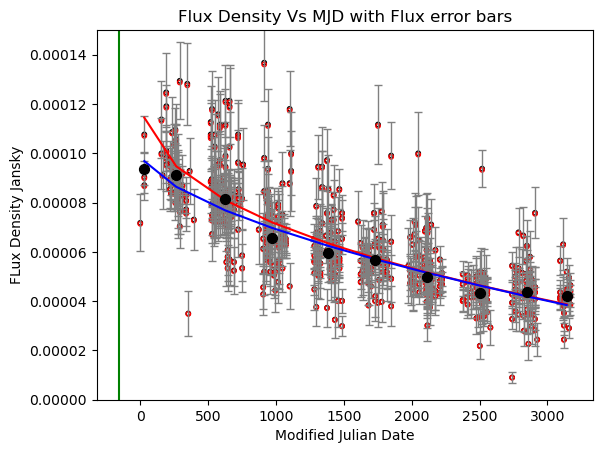

In [84]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(MJD,abflux , s = 10, edgecolors = 'r', facecolors = 'none', zorder = 1)
plt.scatter(x,medopflux, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,opflux, yerr =np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('FLux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
plt.ylim(0, 0.00015)

plt.axvline(x= 53327-st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x, *popt1), 'r-', zorder=3)
plt.plot(x, f(x,*popt2), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g-', zorder=3)


In [68]:
def mase(actual : np.ndarray, predicted : np.ndarray):

    forecast_error = np.mean(np.abs(actual - predicted))
    naive_forecast = np.mean(np.abs(np.diff(actual)))
    mase = forecast_error / naive_forecast

    return mase

In [ ]:
actual = medopflux
predicted1 = func(x,)
predicted2 = func(x,)



In [ ]:
mase(actual,predicted1)

In [ ]:
mase(actual,predicted2)

In [ ]:
resid = opflux - func(x,)
chi2 = sum((resid / func(x,))**2)
chi2_red = chi2 / dof
